<div align = "center" style = "color : #4f90d6"><h1>LDA (Modified)</h1></div>

<div align = "center">The following notebook will represent an implementation of the LDA model using the following hyper-parameters :</div>
        <br>
<table style="width:50%; border: 1px solid #4f90d6">
  <tr>
    <th>Number of topics</th>
    <th>Passes</th> 
    <th>Alpha</th>
      <th>eval</th>
  </tr>
  <tr style = "text-align: center;">
    <td>10</td>
    <td>50</td> 
    <td>'auto'</td>
    <td>2000</td>
  </tr>
</table>
<br>

### Loading the dataset

In [ ]:
from tqdm.notebook import tqdm
from os import listdir
from os.path import join

DATA_PATH = '../clean_data'
data = []
for year in listdir(DATA_PATH):
    for month in tqdm(listdir(join(DATA_PATH, year)), desc = f"Loading data for year {year}"):
        for file in listdir(join(join(DATA_PATH,year), month)):
            with open(join(join(join(DATA_PATH,year), month), file)) as file:
                data.append([file.read(), month, year])

### Removing special characters

Note : This did not really affect the result since the data is already clean, but it is always better to make sure

In [ ]:
import scattertext as st
import pandas as pd
tqdm.pandas()
import re 

def preprocess(text):
    text=re.sub("&lt;/?.*?&gt;", " &lt;&gt; ", text)
    text=re.sub('(\\d|\\W)+', " ", text)
    return text
    
data_df = pd.DataFrame(data, columns = ['raw_text', 'month', 'year'])
data_df.raw_text = data_df.raw_text.progress_apply(lambda x :preprocess(x))

### Merging all articles per year

In [ ]:
yearly_list = []
for index, year in tqdm(enumerate(range(2015, 2021))):
    text_list = []
    for month in tqdm(range(1, 13), desc = f'Year : {year}'):
        text_data = data_df[(data_df.year == str(year)) & (data_df.month == str(month))].raw_text
        text_list.append(text_data)
    yearly_list.append([text_list, year])

### Generating a CountVectorizer

In [ ]:
from gensim import corpora, models
from sklearn.feature_extraction.text import CountVectorizer
from gensim import corpora, models, similarities, matutils
from gensim.models.ldamodel import LdaModel
from gensim.models.ldamulticore import LdaMulticore
from sklearn.feature_extraction.text import TfidfVectorizer
vec = CountVectorizer(max_df =.95,min_df = .30,stop_words='english')
counts = vec.fit_transform(data_df.raw_text).transpose()

In [59]:
counts.shape

(650, 34118)

#### Converting the sparse matrix into Gensim corpus format

In [60]:
corpus = matutils.Sparse2Corpus(counts)

In [61]:
dictionary = dict((v, k) for k, v in vec.vocabulary_.items())

In [62]:
len(dictionary)

650

In [63]:
# Dictionary to store topics in
validation_50p = {}

In [64]:
import numpy as np

### Generating the LDA model

In [74]:
# Loop through 12-20 topics to see optimal number of topics
no_of_topics = 10
print('Running LDA with 50 passes for {} topics...'.format(10))
lda_model = LdaModel(corpus, num_topics=no_of_topics, id2word = dictionary, passes=50, alpha='auto', eval_every=2000)

Running LDA with 50 passes for 10 topics...


In [75]:
lda_model.save('lda_model.model'.format(no_of_topics))

### Result (10 topics)

In [76]:
lda_model.show_topics(num_topics=-1, num_words=5, formatted=False)

[(0,
  [('node', 0.10628573),
   ('graph', 0.09999144),
   ('edge', 0.06328529),
   ('path', 0.04252326),
   ('network', 0.036527093)]),
 (1,
  [('program', 0.018814186),
   ('type', 0.018658182),
   ('data', 0.016680367),
   ('memory', 0.015755676),
   ('code', 0.0144457575)]),
 (2,
  [('model', 0.04706868),
   ('learn', 0.046497725),
   ('network', 0.031201702),
   ('et', 0.025458517),
   ('al', 0.025390053)]),
 (3,
  [('data', 0.032586712),
   ('http', 0.030724386),
   ('user', 0.017481107),
   ('org', 0.017096765),
   ('information', 0.012293593)]),
 (4,
  [('model', 0.06873068),
   ('state', 0.041672736),
   ('time', 0.028242718),
   ('control', 0.026444852),
   ('action', 0.023085792)]),
 (5,
  [('let', 0.033837724),
   ('set', 0.03324001),
   ('proof', 0.0290814),
   ('follow', 0.028320692),
   ('theorem', 0.025905743)]),
 (6,
  [('network', 0.03541458),
   ('pp', 0.028374957),
   ('user', 0.02488201),
   ('ieee', 0.024063217),
   ('power', 0.021582438)]),
 (7,
  [('image', 0.07

### Creating a summary for each LDA topic

In [123]:
topics = {
    0 : 'graph theory/paths',
    1 : 'System Design/OS/Optimisation',
    2 : 'Artificial Intelligence/Neural Networks',
    3 : 'Http/internet',
    4 : 'Diagrams/Control flows',
    5 : 'theorems/concepts',
    6 : 'networking',
    7 : 'Computer Vision AI',
    8 : 'Algorithms/Complexity/Efficiency',
    9 : 'data analysis/Statistics'
}

In [87]:
graph_theory = lda_model.show_topics(num_topics=-1, num_words=50)[0][1].split()

### Gathering words for each Topic

In [88]:
graph_theory_words = []
for word in np.arange(0,len(graph_theory))[::2]:
    graph_theory_words.append(int(float(graph_theory[word].split('*')[0])*1000)*[graph_theory[word].split('*')[1].split('"')[1]])

In [91]:
software_arch = lda_model.show_topics(num_topics=-1, num_words=50)[1][1].split()

In [93]:
software_arch_words = []
for word in np.arange(0,len(Software_arch))[::2]:
    software_arch_words.append(int(float(software_arch[word].split('*')[0])*1000)*[software_arch[word].split('*')[1].split('"')[1]])

In [95]:
artificial_intelligence = lda_model.show_topics(num_topics=-1, num_words=50)[2][1].split()

In [97]:
artificial_intelligence_words= []
for word in np.arange(0,len(Software_arch))[::2]:
    artificial_intelligence_words.append(int(float(artificial_intelligence[word].split('*')[0])*1000)*[artificial_intelligence[word].split('*')[1].split('"')[1]])

In [99]:
internet = lda_model.show_topics(num_topics=-1, num_words=50)[3][1].split()

In [100]:
internet_words = []
for word in np.arange(0,len(Software_arch))[::2]:
    internet_words.append(int(float(internet[word].split('*')[0])*1000)*[internet[word].split('*')[1].split('"')[1]])

In [102]:
control_flows = lda_model.show_topics(num_topics=-1, num_words=50)[4][1].split()

In [103]:
control_flows_words = []
for word in np.arange(0,len(Software_arch))[::2]:
    control_flows_words.append(int(float(control_flows[word].split('*')[0])*1000)*[control_flows[word].split('*')[1].split('"')[1]])

In [105]:
theorems = lda_model.show_topics(num_topics=-1, num_words=50)[5][1].split()

In [106]:
theorems_words = []
for word in np.arange(0,len(theorems))[::2]:
    theorems_words.append(int(float(theorems[word].split('*')[0])*1000)*[theorems[word].split('*')[1].split('"')[1]])

In [108]:
networking = lda_model.show_topics(num_topics=-1, num_words=50)[6][1].split()

In [109]:
networking_words = []
for word in np.arange(0,len(networking))[::2]:
    networking_words.append(int(float(networking[word].split('*')[0])*1000)*[networking[word].split('*')[1].split('"')[1]])

In [111]:
computer_vision_ai = lda_model.show_topics(num_topics=-1, num_words=50)[7][1].split()

In [112]:
computer_vision_ai_words = []
for word in np.arange(0,len(computer_vision_ai))[::2]:
    computer_vision_ai_words.append(int(float(computer_vision_ai[word].split('*')[0])*1000)*[computer_vision_ai[word].split('*')[1].split('"')[1]])

In [114]:
algorithms = lda_model.show_topics(num_topics=-1, num_words=50)[8][1].split()

In [115]:
algorithms_words = []
for word in np.arange(0,len(algorithms))[::2]:
    algorithms_words.append(int(float(algorithms[word].split('*')[0])*1000)*[algorithms[word].split('*')[1].split('"')[1]])

In [120]:
data_analysis = lda_model.show_topics(num_topics=-1, num_words=50)[9][1].split()

In [121]:
data_analysis_words = []
for word in np.arange(0,len(data_analysis))[::2]:
    data_analysis_words.append(int(float(data_analysis[word].split('*')[0])*1000)*[data_analysis[word].split('*')[1].split('"')[1]])

In [124]:
topics

{0: 'graph theory/paths',
 1: 'System Design/OS/Optimisation',
 2: 'Artificial Intelligence/Neural Networks',
 3: 'Http/internet',
 4: 'Diagrams/Control flows',
 5: 'theorems/concepts',
 6: 'networking',
 7: 'Computer Vision AI',
 8: 'Algorithms/Complexity/Efficiency',
 9: 'data analysis/Statistics'}

### Predicting topics of each article

In [125]:
art_topics_test = []
for article in np.arange(21670,21790):
    art_topics_test.append(lda_model.get_document_topics(corpus[article], 
                                           minimum_probability=0.15,   
                                                   # minprob will need to be adjusted based on no of topics generated by the model!
                                           minimum_phi_value=None, 
                                           per_word_topics=False)
#               .sort(key=itemgetter(1),reverse=True)
             )

In [128]:
from operator import itemgetter
for i in art_topics_test:
    i.sort(key=itemgetter(1),reverse=True)

### Results of predictions

In [129]:
for k,v in enumerate(art_topics_test,start=21670):
    print(k,v)

21670 [(2, 0.25193515), (3, 0.2287345), (8, 0.1997692)]
21671 [(5, 0.38689923), (1, 0.23389684), (9, 0.20809332), (8, 0.1555858)]
21672 [(5, 0.52104235), (1, 0.21367817), (9, 0.21052508)]
21673 [(2, 0.6772495)]
21674 [(5, 0.7234306)]
21675 [(3, 0.31776705), (9, 0.21276301)]
21676 [(8, 0.24557295), (0, 0.23300366), (6, 0.23021145), (3, 0.18707289)]
21677 [(3, 0.71139145), (4, 0.17527257)]
21678 [(8, 0.3898163), (4, 0.19579571), (9, 0.17085668)]
21679 [(2, 0.45769253), (7, 0.20272313)]
21680 [(2, 0.40001923), (4, 0.20533152)]
21681 [(3, 0.68866205), (1, 0.18128638)]
21682 [(5, 0.5347781)]
21683 [(6, 0.6909189), (9, 0.16687047)]
21684 [(3, 0.34134224), (2, 0.23845913), (7, 0.23830615)]
21685 [(2, 0.51524544), (7, 0.18748358)]
21686 [(3, 0.27424288), (7, 0.25117216), (9, 0.19462517)]
21687 [(8, 0.443754), (7, 0.1692463)]
21688 [(3, 0.54577017), (1, 0.36973155)]
21689 [(4, 0.34103283), (9, 0.2267194), (5, 0.17670313)]
21690 [(3, 0.5458069), (1, 0.3697199)]
21691 [(2, 0.39254543), (7, 0.2586

In [ ]:
data_df.iloc[21789].raw_text

In [134]:
# Ok, now let's add the topics to a list to add to the articles
art_topics = []
for article in corpus:
    art_topics.append(lda_model.get_document_topics(article, 
                                           minimum_probability=0.15,   
                                           minimum_phi_value=None, 
                                           per_word_topics=False)
             )

In [135]:
# Let's see if the two line up
print(len(art_topics))
print(len(data_df))

34118
34118


In [136]:
# Yep, so let's merge them
data_df['lda_topic'] = art_topics

In [137]:
# get max number of topics
data_df.lda_topic.map(len).max()

5

In [138]:
for t in np.arange(0,10):
    data_df[topics[t]] = [[i[1] if i[0]==t else 0 for i in a] for a in data_df['lda_topic']]
    data_df[topics[t]] = [[i for i in a if i > 0] for a in data_df[topics[t]]]
    data_df[topics[t]] = data_df[topics[t]].apply(lambda x: 0 if len(x)==0 else x[0])

In [139]:
data_df

,raw_text,month,year,lda_topic,graph theory/paths,System Design/OS/Optimisation,Artificial Intelligence/Neural Networks,Http/internet,Diagrams/Control flows,theorems/concepts,networking,Computer Vision AI,Algorithms/Complexity/Efficiency,data analysis/Statistics
0,explicit model predictive control accuracy ana...,9,2015,"[(4, 0.31151327), (5, 0.19254258), (9, 0.22815...",0.000000,0.00000,0.000000,0.000000,0.311513,0.192543,0.000000,0.000000,0.000000,0.228155
1,identification source rumor social network inc...,9,2015,"[(0, 0.15550731), (3, 0.25743544), (6, 0.26680...",0.155507,0.00000,0.000000,0.257435,0.000000,0.000000,0.266802,0.000000,0.000000,0.261458
2,online buyatbulk network design deeparnab chak...,9,2015,"[(0, 0.21866086), (5, 0.24810462), (8, 0.50811...",0.218661,0.00000,0.000000,0.000000,0.000000,0.248105,0.000000,0.000000,0.508116,0.000000
3,unsupervised discovery linguistic structure in...,9,2015,"[(2, 0.18044645), (7, 0.47094175)]",0.000000,0.00000,0.180446,0.000000,0.000000,0.000000,0.000000,0.470942,0.000000,0.000000
4,ar x iv v c i ep multiobjective optimization r...,9,2015,"[(6, 0.651266), (8, 0.16374989)]",0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.651266,0.000000,0.163750,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34113,cod cache network resolvability property li ta...,5,2016,"[(0, 0.17818905), (5, 0.22901648), (6, 0.535186)]",0.178189,0.00000,0.000000,0.000000,0.000000,0.229016,0.535186,0.000000,0.000000,0.000000
34114,hierarchical bayesian noise inference robust r...,5,2016,"[(2, 0.15707724), (7, 0.4602046), (9, 0.163904...",0.000000,0.00000,0.157077,0.000000,0.000000,0.000000,0.000000,0.460205,0.000000,0.163905
34115,commondescription learn framework learn algori...,5,2016,"[(1, 0.1718701), (2, 0.50251734)]",0.000000,0.17187,0.502517,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
34116,ar x iv v c d pr random cluster dynamic ising ...,5,2016,"[(0, 0.24753971), (4, 0.23822562), (5, 0.35474...",0.247540,0.00000,0.000000,0.000000,0.238226,0.354749,0.000000,0.000000,0.000000,0.000000


In [140]:
data_df.sort_values(by='lda_topic',inplace=True)

In [142]:
data_df.head()

,raw_text,month,year,lda_topic,graph theory/paths,System Design/OS/Optimisation,Artificial Intelligence/Neural Networks,Http/internet,Diagrams/Control flows,theorems/concepts,networking,Computer Vision AI,Algorithms/Complexity/Efficiency,data analysis/Statistics
26122,,4,2018,[],0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
24138,deep graph emmanouil antonios platanios machin...,6,2018,"[(0, 0.15004155), (2, 0.3766812), (8, 0.200078...",0.150042,0.0,0.376681,0.000000,0.0,0.0,0.000000,0.0,0.200079,0.000000
25945,relate modularity maximization stochastic bloc...,4,2018,"[(0, 0.15007444), (2, 0.21829453), (9, 0.15656...",0.150074,0.0,0.218295,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.156566
201,echoarxiv page echo chamber age misinformation...,9,2015,"[(0, 0.1500762), (3, 0.39288762), (6, 0.165687...",0.150076,0.0,0.000000,0.392888,0.0,0.0,0.165687,0.0,0.000000,0.156885
17358,maximize task throughput iotenabled g network ...,5,2019,"[(0, 0.1501063), (6, 0.43491194), (8, 0.191632...",0.150106,0.0,0.000000,0.000000,0.0,0.0,0.434912,0.0,0.191632,0.000000


In [143]:
data_df.to_csv('final_result.csv')

In [223]:
years_strength = data_df.drop(['lda_topic','raw_text'],axis=1).groupby(['year', 'month']).sum()

In [224]:
years_strength.reset_index(level=years_strength.index.names, inplace=True)

In [225]:
years_strength['Date'] = years_strength['month'] +'-'+ years_strength['year']

In [226]:
years_strength = years_strength.drop(['month', 'year'], 1)

In [229]:
years_strength['Date'] = pd.to_datetime(years_strength['Date'])

In [238]:
years_strength.sort_values(by = 'Date')
years_strength.set_index('Date', inplace=True)

### Final Result

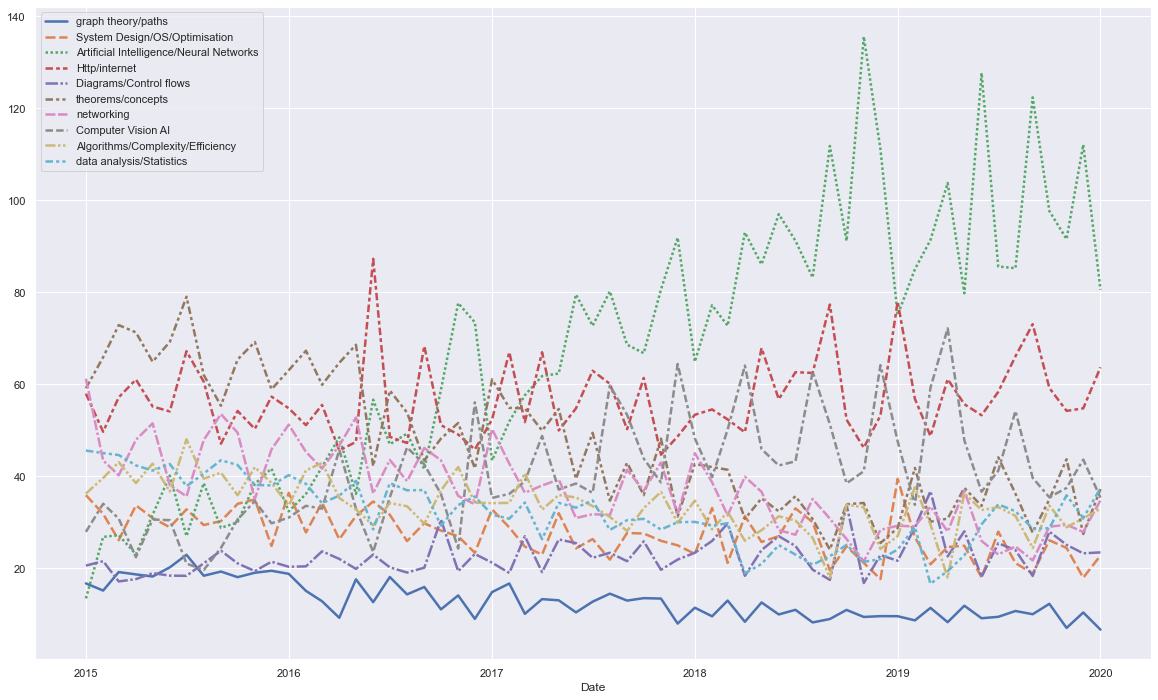

In [258]:
import pandas as pd
import matplotlib.pylab as plt
from pandas.plotting import andrews_curves
import seaborn as sns
sns.set(rc={'figure.figsize':(20,12), "lines.linewidth": 2.5})
sns.set_style("darkgrid")
plot = sns.lineplot(data = years_strength.query("Date < '02-01-2020'"))
plot.get_figure().savefig("result.png",dpi=400)